<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-pyproj-with-cartopy" data-toc-modified-id="Using-pyproj-with-cartopy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using pyproj with cartopy</a></span><ul class="toc-item"><li><span><a href="#Put-the-corners-of-a-modis-granule-on-the-map.--Use-this-2013.220.2105-granule" data-toc-modified-id="Put-the-corners-of-a-modis-granule-on-the-map.--Use-this-2013.220.2105-granule-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Put the corners of a modis granule on the map.  Use this 2013.220.2105 granule</a></span><ul class="toc-item"><li><span><a href="#Find-the-image-corners-using-parseMeta" data-toc-modified-id="Find-the-image-corners-using-parseMeta-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Find the image corners using parseMeta</a></span></li><li><span><a href="#Make-an-LAEA-projection-using-the-spherical-globe" data-toc-modified-id="Make-an-LAEA-projection-using-the-spherical-globe-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Make an LAEA projection using the spherical globe</a></span></li><li><span><a href="#Here-are-the-parameters-cartopy-is-using-to-call-pyproj" data-toc-modified-id="Here-are-the-parameters-cartopy-is-using-to-call-pyproj-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Here are the parameters cartopy is using to call pyproj</a></span></li><li><span><a href="#Make-a-pyproj-projection-using-the-cartopy-parameters" data-toc-modified-id="Make-a-pyproj-projection-using-the-cartopy-parameters-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Make a pyproj projection using the cartopy parameters</a></span></li><li><span><a href="#Now-repeat-this-using-the-modern-WGS84-non-spherical-earth-datum" data-toc-modified-id="Now-repeat-this-using-the-modern-WGS84-non-spherical-earth-datum-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Now repeat this using the modern WGS84 non-spherical earth datum</a></span></li><li><span><a href="#now-get-the-Vancouver-location-in-transformed-coords" data-toc-modified-id="now-get-the-Vancouver-location-in-transformed-coords-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>now get the Vancouver location in transformed coords</a></span></li><li><span><a href="#Note-that-the-scene-center-is-0,0-in-the-transformed-coordinates" data-toc-modified-id="Note-that-the-scene-center-is-0,0-in-the-transformed-coordinates-1.1.7"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Note that the scene center is 0,0 in the transformed coordinates</a></span></li><li><span><a href="#To-set-the-extent-for-the-plot,-find-the-x,y-mins-and-maxes" data-toc-modified-id="To-set-the-extent-for-the-plot,-find-the-x,y-mins-and-maxes-1.1.8"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>To set the extent for the plot, find the x,y mins and maxes</a></span></li><li><span><a href="#show-that-we-get-a-&quot;perfect-fit&quot;--with-this-extent" data-toc-modified-id="show-that-we-get-a-&quot;perfect-fit&quot;--with-this-extent-1.1.9"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>show that we get a "perfect fit"  with this extent</a></span></li><li><span><a href="#Write-the-corner-points-out-as-a-json-file-for-future-use" data-toc-modified-id="Write-the-corner-points-out-as-a-json-file-for-future-use-1.1.10"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Write the corner points out as a json file for future use</a></span></li><li><span><a href="#Use-pyproj.geoid-to-get-distance-between-points" data-toc-modified-id="Use-pyproj.geoid-to-get-distance-between-points-1.1.11"><span class="toc-item-num">1.1.11&nbsp;&nbsp;</span>Use <a href="https://jswhit.github.io/pyproj/pyproj.Geod-class.html" target="_blank">pyproj.geoid</a> to get distance between points</a></span></li></ul></li></ul></li></ul></div>

# Using pyproj with cartopy

The cells below show how to do coordinate transformations with either pyproj or cartopy. 
Since cartopy uses pyproj under the hood, we expect the same results.

In [1]:
from context import data_dir
import json
from a301.utils.data_read import download
import a301
import pprint
read_data=False
if read_data:
    filename='MYD021KM.A2013222.2105.061.2018047235850.hdf'
    download(filename)
    local_file = Path.cwd() / Path(filename)
    to_file = data_dir / Path(filename)
    local_file.rename(to_file)  

******************************
context imported. Front of path:
/Users/phil/repos/a301_code
******************************


data directory context.data_dir = /Users/phil/repos/a301_code/data


data directory a301.data_dir = /Users/phil/repos/a301_code/data



In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
from pathlib import Path
import pprint
import numpy as np
#

In [3]:
# Datum: radius of the earth in meters
#
radius=6371228
#
# vancouver longitude, latitude indegrees
#
van_lon,van_lat = [-123.1207,49.2827]
#
# use a simple sphere as the datum
#
globe = ccrs.Globe(ellipse=None, semimajor_axis=radius, 
                   semiminor_axis=radius)

## Put the corners of a modis granule on the map.  Use this 2013.220.2105 granule

<img src="images/myd2105.jpg" width=400>



### Find the image corners using parseMeta

In [4]:
%matplotlib inline
from a301.scripts.modismeta_read import parseMeta
import context
data_dir=Path(context.data_dir)
modis_file=list(data_dir.glob("MYD02*2105*hdf"))[0]
modis_dict=parseMeta(modis_file)

### Make an LAEA projection using the spherical globe

In [5]:
pprint.pprint(modis_dict)
projection=ccrs.LambertAzimuthalEqualArea(central_latitude=modis_dict['lat_0'],
                                          central_longitude= modis_dict['lon_0'],globe=globe)

{'daynight': 'Day',
 'equatordate': '2013-08-10 UCT',
 'equatortime': '21:45:48 UCT',
 'filename': 'MYD021KM.A2013222.2105.061.2018047235850.hdf',
 'lat_0': 39.59910106367865,
 'lat_list': array([32.13645208, 28.68737463, 45.73346986, 50.51082749]),
 'lon_0': -121.4048713497655,
 'lon_list': array([-104.7708939 , -129.00539789, -138.0388488 , -107.00171861]),
 'max_lat': 50.5108274923951,
 'max_lon': -104.770893902908,
 'min_lat': 28.6873746349622,
 'min_lon': -138.038848796623,
 'nasaProductionDate': '2018-02-16 UCT',
 'orbit': '59949',
 'startdate': '2013-08-10 UCT',
 'starttime': '21:05:00 UCT',
 'stopdate': '2013-08-10 UCT',
 'stoptime': '21:10:00 UCT'}


### Here are the parameters cartopy is using to call pyproj

In [6]:
projection.proj4_params

{'a': 6371228,
 'b': 6371228,
 'proj': 'laea',
 'lon_0': -121.4048713497655,
 'lat_0': 39.59910106367865,
 'x_0': 0.0,
 'y_0': 0.0}

In [7]:
projection.proj4_init

'+a=6371228 +b=6371228 +proj=laea +lon_0=-121.4048713497655 +lat_0=39.59910106367865 +x_0=0.0 +y_0=0.0 +no_defs'

### Make a pyproj projection using the cartopy parameters

Show that we can "roundtrip" the coordinates -- i.e. go from lon,lat to x,y to lon, lat
and get the starting values back

In [8]:
import pyproj
prj=pyproj.Proj(projection.proj4_init)
print('here are the lon,lat corners')
pprint.pprint(list(zip(modis_dict['lon_list'],modis_dict['lat_list'])))
x, y = prj(modis_dict['lon_list'], modis_dict['lat_list'])
print('here are the x,y corner coords')
pprint.pprint(list(zip(x,y)))
llcrnrlon,llcrnrlat=prj(x,y,inverse=True)
print('here are the lon,lat corners after roundtrip')
pprint.pprint(list(zip(llcrnrlon,llcrnrlat)))

here are the lon,lat corners
[(-104.770893902908, 32.1364520798063),
 (-129.005397891393, 28.6873746349622),
 (-138.038848796623, 45.7334698608189),
 (-107.001718605882, 50.5108274923951)]
here are the x,y corner coords
[(1558369.4782928652, -689784.5794633608),
 (-743734.0166315038, -1181868.8587295618),
 (-1282092.666900609, 805156.6303537387),
 (1016368.519516534, 1298134.0921786516)]
here are the lon,lat corners after roundtrip
[(-104.770893902908, 32.1364520798063),
 (-129.005397891393, 28.687374634962197),
 (-138.038848796623, 45.73346986081891),
 (-107.001718605882, 50.5108274923951)]


### Now repeat this using the modern WGS84 non-spherical earth datum

**Note that changing to this datum makes a difference of about 3 km, (i.e. 1558 km becomes 1561 km below)**

In [9]:
globe_w = ccrs.Globe(datum="WGS84",ellipse="WGS84")

In [10]:
projection_w=ccrs.LambertAzimuthalEqualArea(central_latitude=modis_dict['lat_0'],
                                          central_longitude= modis_dict['lon_0'],globe=globe_w)
print(projection_w.proj4_init)
prj_w=pyproj.Proj(projection_w.proj4_init)
print('here are the lon,lat corners')
pprint.pprint(list(zip(modis_dict['lon_list'],modis_dict['lat_list'])))
x_w84, y_w84 = prj_w(modis_dict['lon_list'], modis_dict['lat_list'])
print('here are the x_w84,y_84 corner coords')
pprint.pprint(list(zip(x_w84,y_w84)))
print('here are the old x,y corner coords')
pprint.pprint(list(zip(x,y)))
llcrnrlon,llcrnrlat=prj_w(x_w84,y_w84,inverse=True)
print('here are the new lon,lat corners after roundtrip')
pprint.pprint(list(zip(llcrnrlon,llcrnrlat)))

+datum=WGS84 +ellps=WGS84 +proj=laea +lon_0=-121.4048713497655 +lat_0=39.59910106367865 +x_0=0.0 +y_0=0.0 +no_defs
here are the lon,lat corners
[(-104.770893902908, 32.1364520798063),
 (-129.005397891393, 28.6873746349622),
 (-138.038848796623, 45.7334698608189),
 (-107.001718605882, 50.5108274923951)]
here are the x_w84,y_84 corner coords
[(1561347.9917805532, -688348.6658615287),
 (-744961.1366254934, -1179100.5032042824),
 (-1285873.5967137816, 804312.7470663546),
 (1019738.9399581843, 1297248.5261361937)]
here are the old x,y corner coords
[(1558369.4782928652, -689784.5794633608),
 (-743734.0166315038, -1181868.8587295618),
 (-1282092.666900609, 805156.6303537387),
 (1016368.519516534, 1298134.0921786516)]
here are the new lon,lat corners after roundtrip
[(-104.77089390290801, 32.13645206898284),
 (-129.005397891393, 28.687374622563773),
 (-138.038848796623, 45.73346985640787),
 (-107.001718605882, 50.510827489422674)]


### now get the Vancouver location in transformed coords

**First do it with cartopy:**

In [11]:
geodetic = ccrs.Geodetic()
van_point = projection_w.transform_point(van_lon,van_lat,geodetic)
print(van_point)

(-125297.12993229258, 1075921.9766805128)


**now do it with pyproj to show result doesn't change:**

In [12]:
geodetic_prj = pyproj.Proj(geodetic.proj4_init)
van_point_prj = pyproj.transform(geodetic_prj,prj_w,van_lon,van_lat)
print(van_point_prj)
van_x, van_y = van_point_prj

(-125297.12993229258, 1075921.9766805128)


### Note that the scene center is 0,0 in the transformed coordinates

In [13]:
center_point = projection_w.transform_point(modis_dict['lon_0'],modis_dict['lat_0'],geodetic)
print(center_point)

(0.0, 0.0)


### To set the extent for the plot, find the x,y mins and maxes

In [14]:
minx,maxx=np.min(x_w84),np.max(x_w84)
miny,maxy=np.min(y_w84),np.max(y_w84)
#left x, right x, left y, right y
extent=[minx, maxx, miny, maxy]

### show that we get a "perfect fit"  with this extent

First, plot vancover, then add to the plot by calling:

    display(fig)
    
to redisplay the figure.

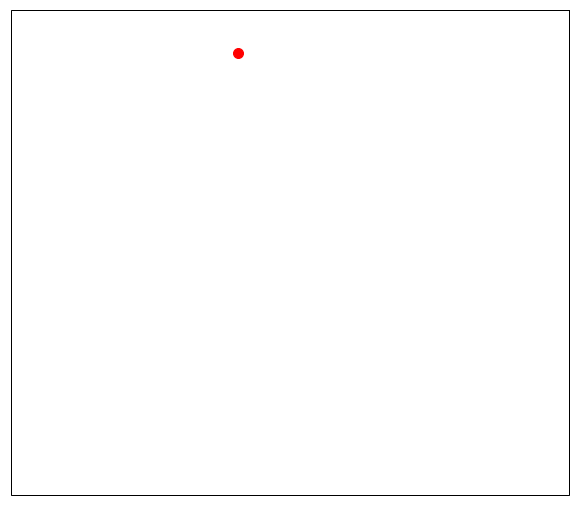

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,10),
                       subplot_kw={'projection': projection_w})
ax.set_extent(extent,projection_w)
ax.plot(van_x,van_y,'ro',markersize=10);

**Next add coastlines**

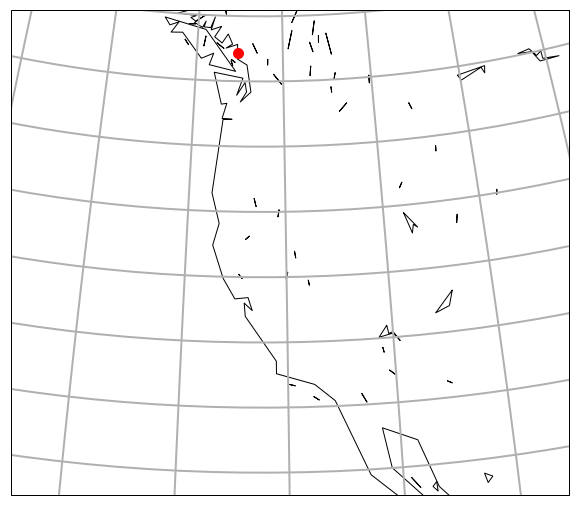

In [16]:
ax.gridlines(linewidth=2)
ax.add_feature(cartopy.feature.GSHHSFeature(scale='coarse', levels=[1,2,3]));
display(fig)

**now get the corner points of the image and plot the box with center point**

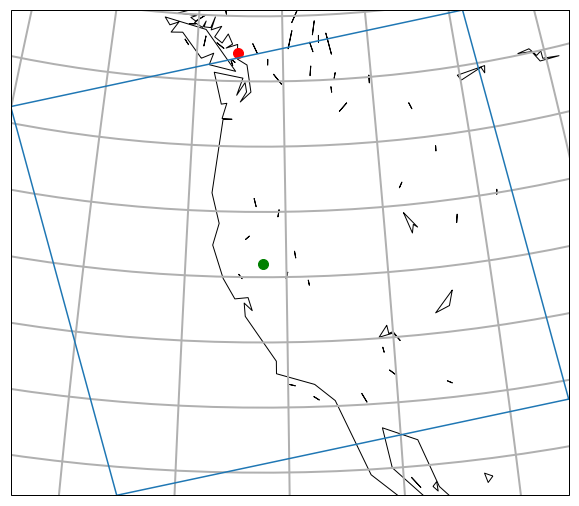

In [17]:
out=projection_w.transform_points(geodetic,np.array(modis_dict['lon_list']),
                                  np.array(modis_dict['lat_list']))
xcoords = np.append(out[:,0],out[0,0])
ycoords = np.append(out[:,1],out[0,1])
ax.plot(xcoords, ycoords);
ax.plot(0,0,'go',markersize=10)
display(fig)

### Write the corner points out as a json file for future use

[What is json?](https://www.w3schools.com/Js/js_json_intro.asp)

(note that json doesn't understand numpy arrays, so need to convert them to python lists)

In [18]:
xcoords=list(xcoords)
ycoords=list(ycoords)
corner_dict = dict(xcoords=xcoords, ycoords=ycoords)
llcrnrlon,llcrnrlat=prj_w(xcoords,ycoords,inverse=True)
lons=list(llcrnrlon)
lats=list(llcrnrlat)
corner_dict['lons']=lons
corner_dict['lats']=lats
corner_dict['proj4_string']=projection_w.proj4_init
corner_dict['proj4_params']=projection_w.proj4_params
corner_dict['extent']=extent
pprint.pprint(corner_dict)

{'extent': [-1285873.5967137816,
            1561347.9917805532,
            -1179100.5032042824,
            1297248.5261361937],
 'lats': [32.13645206898284,
          28.687374622563773,
          45.73346985640787,
          50.510827489422674,
          32.13645206898284],
 'lons': [-104.77089390290801,
          -129.005397891393,
          -138.038848796623,
          -107.001718605882,
          -104.77089390290801],
 'proj4_params': {'datum': 'WGS84',
                  'ellps': 'WGS84',
                  'lat_0': 39.59910106367865,
                  'lon_0': -121.4048713497655,
                  'proj': 'laea',
                  'x_0': 0.0,
                  'y_0': 0.0},
 'proj4_string': '+datum=WGS84 +ellps=WGS84 +proj=laea '
                 '+lon_0=-121.4048713497655 +lat_0=39.59910106367865 +x_0=0.0 '
                 '+y_0=0.0 +no_defs',
 'xcoords': [1561347.9917805532,
             -744961.1366254934,
             -1285873.5967137816,
             1019738.9399581843,
   

In [19]:
corner_output = a301.data_dir / Path('corners.json')
with open(corner_output,'w') as f:
    json.dump(corner_dict,f,indent=4)

```python
# %load ../data/corners.json
{
    "xcoords": [
        1561347.9917805532,
        -744961.1366254934,
        -1285873.5967137816,
        1019738.9399581843,
        1561347.9917805532
    ],
    "ycoords": [
        -688348.6658615287,
        -1179100.5032042824,
        804312.7470663546,
        1297248.5261361937,
        -688348.6658615287
    ],
    "lons": [
        -104.77089390290801,
        -129.005397891393,
        -138.038848796623,
        -107.001718605882,
        -104.77089390290801
    ],
    "lats": [
        32.13645206898284,
        28.687374622563773,
        45.73346985640787,
        50.510827489422674,
        32.13645206898284
    ],
    "proj4_string": "+datum=WGS84 +ellps=WGS84 +proj=laea +lon_0=-121.4048713497655 +lat_0=39.59910106367865 +x_0=0.0 +y_0=0.0 +no_defs",
    "proj4_params": {
        "datum": "WGS84",
        "ellps": "WGS84",
        "proj": "laea",
        "lon_0": -121.4048713497655,
        "lat_0": 39.59910106367865,
        "x_0": 0.0,
        "y_0": 0.0
    },
    "extent": [
        -1285873.5967137816,
        1561347.9917805532,
        -1179100.5032042824,
        1297248.5261361937
    ]
}
```

### Use [pyproj.geoid](https://jswhit.github.io/pyproj/pyproj.Geod-class.html) to get distance between points

In [20]:
from pyproj import Geod
g = Geod(ellps='WGS84')
bottom_right=[lons[0],lats[0]]
bottom_left=[lons[1],lats[1]]
top_left=[lons[2],lats[2]]
top_right=[lons[3],lats[3]]
az1,az2,ew_dist=g.inv(bottom_left[0],bottom_left[1],bottom_right[0],bottom_right[1])
az3,az4,ns_dist=g.inv(bottom_left[0],bottom_left[1],top_left[0],top_left[1])

In [21]:
print((f'east-west distance is {ew_dist*1.e-3:8.3f} km,'
       f'\nnorth-south distance is {ns_dist*1.e-3:8.3f} km'))

east-west distance is 2354.609 km,
north-south distance is 2051.469 km


In [22]:
points_xy=list(zip(xcoords,ycoords))
bottom_right_x,bottom_right_y = points_xy[0]
bottom_left_x, bottom_left_y = points_xy[1]
top_left_x, top_left_y = points_xy[2]

In [23]:
ew_dist=(bottom_right_x-bottom_left_x)
ns_dist=(top_left_y-bottom_left_y)
print((f'east-west distance is {ew_dist*1.e-3:8.3f} km,'
       f'\nnorth-south distance is {ns_dist*1.e-3:8.3f} km'))

east-west distance is 2306.309 km,
north-south distance is 1983.413 km
